# -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. Katie's code BEGINS Here -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

### NOTE: Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.

In [1]:
#Dependencies

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import seaborn as sns
from scipy import stats

In [2]:
#Import csv file - Life Expectancy.  This is for all countries 2000-2015
# https://www.kaggle.com/kumarajarshi/life-expectancy-who/version/1

#Import csv file - Life Expectancy since 1970 (44 countries)
csv_path = "Resources/Life_Expectancy.csv"
csv_path_2 = "Resources/GDP_1970_to_2018.csv"
csv_path_3 = "Resources/Life_1970.csv"

life_exp = pd.read_csv(csv_path)
gdp_data = pd.read_csv(csv_path_2)
life_exp_1970 = pd.read_csv(csv_path_3)

In [3]:
#clean-up csv

reduced_life = life_exp[["Country","Year","Status","Life expectancy "]]
cleaned_life = reduced_life.rename(columns={"Life expectancy ":"Life Expectancy", "Country":"Country Name"})
cleaned_life.head()

,Country Name,Year,Status,Life Expectancy
0,Afghanistan,2015,Developing,65.0
1,Afghanistan,2014,Developing,59.9
2,Afghanistan,2013,Developing,59.9
3,Afghanistan,2012,Developing,59.5
4,Afghanistan,2011,Developing,59.2


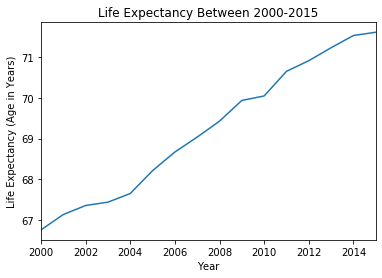

In [4]:
##life expectancy over time 2000-2015 with all countries

cleaned_life.groupby('Year')['Life Expectancy'].mean().plot(kind='line')
plt.title("Life Expectancy Between 2000-2015")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Age in Years)")

#plt.savefig("LifeExp_overtime.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()

In [5]:
# Get mean life expectancy for all countries

cleaned_life.groupby(["Year"]).mean()

,Life Expectancy
Year,
2000,66.750273
2001,67.128962
2002,67.351366
2003,67.433333
2004,67.646448
2005,68.209290
2006,68.667760
2007,69.036066
2008,69.427869


In [6]:
#Add GDP mean

gdp_summary_df = gdp_data.describe()
gdp_summary_df = gdp_summary_df.T
gdp_summary_df = gdp_summary_df.reset_index()
gdp_summary_df = gdp_summary_df.rename(columns={'index':'Year'})
gdp_summary_df.dropna()
gdp_summary_df.head()

,Year,count,mean,std,min,25%,50%,75%,max
0,1970,128.0,2.192232,9.996960,0.001430,0.032350,0.155630,0.899435,107.330
1,1971,129.0,2.404500,10.862507,0.001528,0.036280,0.168522,0.918177,116.485
2,1972,129.0,2.774643,12.106388,0.001894,0.041067,0.196873,0.966416,127.911
3,1973,129.0,3.384638,13.849930,0.002420,0.052355,0.246549,1.384189,142.538
4,1974,130.0,3.872143,15.033388,0.003151,0.057039,0.294950,1.630835,154.524


In [7]:
#Update life expectancy file so that Year is not an index and is able to merge with GDP file

new_life = cleaned_life.groupby(["Year"]).mean()
new_life.reset_index(level=0, inplace=True)
new_life.head()

,Year,Life Expectancy
0,2000,66.750273
1,2001,67.128962
2,2002,67.351366
3,2003,67.433333
4,2004,67.646448


In [8]:
#Update gdp summary file so that the Year column is integer and can merge with life expectancy

gdp_summary_df['Year']=gdp_summary_df['Year'].astype(int)

In [9]:
#Merge life expectancy and gdp file by year

life_gdp_merge = pd.merge(new_life, gdp_summary_df, on='Year')
life_gdp_merge.head()

,Year,Life Expectancy,count,mean,std,min,25%,50%,75%,max
0,2000,66.750273,198.0,16.762124,83.754964,0.001374,0.173945,0.819837,5.318316,1025.23
1,2001,67.128962,198.0,16.678416,84.315263,0.001320,0.168335,0.821834,5.396157,1058.18
2,2002,67.351366,203.0,16.897954,85.626070,0.001545,0.182472,0.777508,5.576783,1093.64
3,2003,67.433333,203.0,18.972212,91.202340,0.001823,0.232230,0.868323,6.401254,1145.82
4,2004,67.646448,204.0,21.287216,98.138302,0.002153,0.280929,1.023246,7.594080,1221.37


The r-squared is: 0.986212457328771


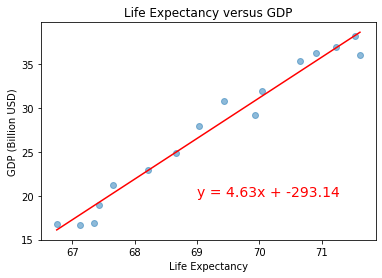

In [10]:
#Graph average life expectancy over time versus average gdp
x_values = life_gdp_merge['Life Expectancy']
y_values = life_gdp_merge['mean']
y_values = y_values.fillna(0)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(69,20),fontsize=14,color="red")
plt.title("Life Expectancy versus GDP")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP (Billion USD)")
print(f"The r-squared is: {rvalue}")

#plt.savefig("LifeExp_vs_GDP.png", bbox_inches = 'tight', pad_inches = 1.0)

plt.show()

In [11]:
#Optional add (for fun)

age = 90
print(f"On average, for the life expectancy of {age} years old, the country GDP would have to be {round(slope * age + intercept,2)} billion USD.")
age2 = 100
print(f"On average, for the life expectancy of {age2} years old, the country GDP would have to be {round(slope * age2 + intercept,2)}. billion USD")

On average, for the life expectancy of 90 years old, the country GDP would have to be 123.82 billion USD.
On average, for the life expectancy of 100 years old, the country GDP would have to be 170.15. billion USD


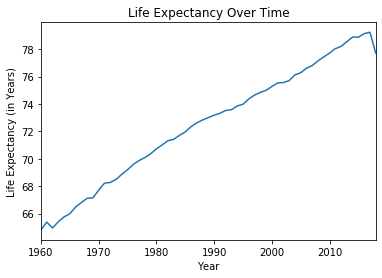

In [12]:
#Life Expectancy over time for 44 countries listed in life exp file from 1970-2017.

life_exp_1970.groupby('TIME')['Value'].mean().plot(kind='line')
plt.title("Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (in Years)")

#plt.savefig("LifeExp_all.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()

In [13]:
#Read in life expectancy from 1970 file.  File only contains 44 countries, so pulling to help show
#USA trend

usa_1970 = life_exp_1970.loc[life_exp_1970['LOCATION'] =='USA']
usa_1970.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
4719,USA,LIFEEXP,MEN,YR,A,1960,66.6,NaN
4720,USA,LIFEEXP,MEN,YR,A,1961,67.1,NaN
4721,USA,LIFEEXP,MEN,YR,A,1962,66.9,NaN
4722,USA,LIFEEXP,MEN,YR,A,1963,66.6,NaN
4723,USA,LIFEEXP,MEN,YR,A,1964,66.8,NaN


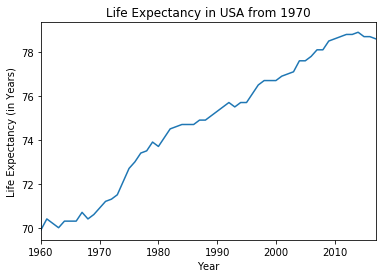

In [14]:
#life expectancy over time for both men and women in USA 1970-2017

total_1970 = usa_1970.loc[usa_1970['SUBJECT'] =='TOT']

total_1970.plot(x="TIME", y="Value", kind='line', legend=False)
plt.title("Life Expectancy in USA from 1970")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (in Years)")
#plt.savefig("LifeExp_USA.png", bbox_inches = 'tight', pad_inches = 1.0)

plt.show()

In [15]:
#Filter out for the year 2000 on the life exp file 2000-2015

year_2000 = cleaned_life.loc[life_exp['Year'] ==2000]
year_2000.head()

,Country Name,Year,Status,Life Expectancy
15,Afghanistan,2000,Developing,54.8
31,Albania,2000,Developing,72.6
47,Algeria,2000,Developing,71.3
63,Angola,2000,Developing,45.3
79,Antigua and Barbuda,2000,Developing,73.6


In [16]:
#Merge life expectancy for the year 2000 and gdp data

merge_2000_gdp = pd.merge(year_2000, gdp_data, on='Country Name')
merge_2000_gdp

,Country Name,Year,Status,Life Expectancy,Country Code,1970,1971,1972,1973,1974,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,2000,Developing,54.8,AFG,0.174889,0.183111,0.159556,0.173333,0.215556,...,1.585657,1.780428,2.000162,2.056105,2.048487,1.990711,1.936264,2.019176,1.936297,NaN
1,Albania,2000,Developing,72.6,ALB,NaN,NaN,NaN,NaN,NaN,...,1.192696,1.289087,1.231978,1.277628,1.322824,1.138693,1.186135,1.302506,1.510250,NaN
2,Algeria,2000,Developing,71.3,DZA,0.486349,0.507722,0.676179,0.871511,1.320971,...,16.120500,20.001500,20.906300,20.975500,21.380900,16.597800,16.003300,16.739000,17.375800,NaN
3,Angola,2000,Developing,45.3,AGO,NaN,NaN,NaN,NaN,NaN,...,8.379950,11.179000,12.805300,13.671000,14.571200,11.619400,10.112400,12.212400,10.575100,NaN
4,Antigua and Barbuda,2000,Developing,73.6,ATG,NaN,NaN,NaN,NaN,NaN,...,0.114870,0.113764,0.119995,0.118145,0.124973,0.133669,0.143659,0.146798,0.161057,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Uruguay,2000,Developing,75.1,URY,0.213710,0.280726,0.218942,0.396430,0.409021,...,4.028448,4.796244,5.126439,5.753123,5.723601,5.327430,5.268761,5.648899,5.959689,NaN
154,Uzbekistan,2000,Developing,67.1,UZB,NaN,NaN,NaN,NaN,NaN,...,4.667988,5.651628,6.362885,6.899717,7.665854,8.184741,8.177901,5.915995,5.049992,NaN
155,Vanuatu,2000,Developing,69.0,VUT,NaN,NaN,NaN,NaN,NaN,...,0.070080,0.079215,0.078170,0.080179,0.081495,0.075969,0.080433,0.088004,0.091430,NaN
156,Zambia,2000,Developing,43.8,ZMB,0.182529,0.168700,0.191071,0.226871,0.312183,...,2.026556,2.346010,2.550337,2.804546,2.715063,2.124335,2.095475,2.586814,2.672007,NaN


In [17]:
merge_2000_gdp = merge_2000_gdp[merge_2000_gdp['Country Name'] != 'United States of America']
merge_2000_gdp = merge_2000_gdp[merge_2000_gdp['Country Name'] != 'Japan']

The r-squared is: 0.3091074914867937
Slope is: 0.7635622610506679


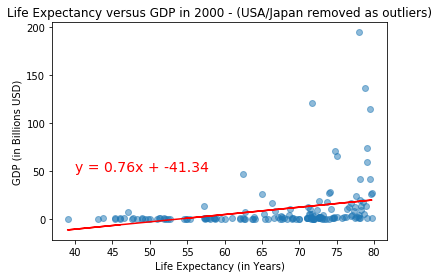

In [18]:
#Life expectancy versus GDP in 2000

x_values = merge_2000_gdp['Life Expectancy']
y_values = merge_2000_gdp['2000']
y_values = y_values.fillna(0)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=14,color="red")
plt.title("Life Expectancy versus GDP in 2000 - (USA/Japan removed as outliers)")
plt.xlabel("Life Expectancy (in Years)")
plt.ylabel("GDP (in Billions USD)")
print(f"The r-squared is: {rvalue}")

print(f"Slope is: {slope}")

#plt.savefig("LifeExp_vs_GDP_2000.png", bbox_inches = 'tight', pad_inches = 1.0)

plt.show()

# -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. Katie's code ENDS Here -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

# -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. Nabeel's code BEGINS Here -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import json
import requests
from config import g_key
import gmaps
import random
from matplotlib.cm import viridis
from matplotlib.colors import to_hex
import gmaps.geojson_geometries
import numpy as np
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

gmaps.configure(api_key = g_key)

# Adding options to display all of the rows of DataFrame w/o truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

csv_file = os.path.join('Resources','GDP_1970_to_2018_wLatLng.csv')
gdp_data = pd.read_csv(csv_file)

In [20]:
gdp_data.head(50)

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Latitude,Longitude
0,Afghanistan,AFG,0.174889,0.183111,0.159556,0.173333,0.215556,0.236667,0.255556,0.295333,0.330000,0.369794,0.364172,0.347879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405518,0.451556,0.522678,0.620914,0.697129,0.974789,1.010922,1.243909,1.585657,1.780428,2.000162,2.056105,2.048487,1.990711,1.936264,2.019176,1.936297,NaN,33.939110,67.709953
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185734,0.189705,0.209733,0.208080,0.205124,0.225309,0.202855,0.109956,0.065217,0.118532,0.188095,0.239276,0.319964,0.225852,0.254597,0.321212,0.348036,0.392210,0.434807,0.561149,0.718468,0.805208,0.889607,1.067732,1.288135,1.204422,1.192696,1.289087,1.231978,1.277628,1.322824,1.138693,1.186135,1.302506,1.510250,NaN,41.153332,20.168331
2,Algeria,DZA,0.486349,0.507722,0.676179,0.871511,1.320971,1.555793,1.772835,2.097190,2.636449,3.324342,4.234528,4.434867,4.520709,4.880137,5.369828,5.793787,6.369630,6.674227,5.908907,5.563149,6.204510,4.571537,4.800330,4.994646,4.254257,4.176405,4.694150,4.817786,4.818775,4.863911,5.478607,5.474325,5.675811,6.786614,8.532477,10.319844,11.703094,13.497873,17.099754,13.721482,16.120507,20.001536,20.906289,20.975476,21.380881,16.597843,16.003293,16.739027,17.375795,NaN,28.033886,1.659626
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051400,0.052700,0.051200,0.050300,0.049600,0.052000,0.056300,0.067800,0.057600,0.057400,0.064400,0.064100,0.064200,0.066100,0.065200,0.060200,0.063600,NaN,-14.270972,-170.132217
4,Andorra,AND,0.007862,0.008941,0.011341,0.015082,0.018656,0.022013,0.022728,0.025402,0.030801,0.041158,0.044642,0.038896,0.037590,0.032786,0.033007,0.034674,0.048200,0.061132,0.072143,0.079545,0.102905,0.110693,0.121001,0.100703,0.101755,0.117874,0.122395,0.118060,0.121193,0.123988,0.143443,0.149691,0.173312,0.239865,0.293566,0.325579,0.354326,0.401697,0.400735,0.366053,0.335570,0.344206,0.316462,0.328159,0.335074,0.281149,0.287731,0.301339,0.323654,NaN,42.506285,1.521801
5,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593050,0.555048,0.555048,0.578434,0.613148,0.755356,0.707206,0.808387,0.876925,1.020110,1.122876,1.060378,0.830781,0.576872,0.443832,0.553875,0.752645,0.764838,0.650623,0.615292,0.912959,0.893606,1.528559,1.781271,2.355205,3.697092,5.238101,6.526645,8.853861,7.030716,8.379950,11.178969,12.805285,13.670986,14.571220,11.619365,10.112385,12.212382,10.575099,NaN,-11.202692,17.873887
6,Antigua and Barbuda,ATG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007750,0.008788,0.010908,0.013143,0.014784,0.016437,0.018214,0.020837,0.024092,0.029044,0.033717,0.039864,0.043879,0.045947,0.048171,0.049928,0.053517,0.058943,0.057728,0.063373,0.068062,0.072786,0.076620,0.083016,0.080074,0.081462,0.085564,0.091958,0.102219,0.115701,0.131140,0.136843,0.122425,0.114870,0.113764,0.119995,0.118145,0.124973,0.133669,0.143659,0.146798,0.161057,NaN,17.060816,-61.796428
7,Argentina,ARG,3.158421,3.329320,3.473300,5.254400,7.243678,5.243865,5.116950,5.678100,5.808287,6.925233,7.696192,7.867684,8.430749,10.397911,7.909200,8.841667,11.093444,11.110619,12.620682,7.663690,14.135237,18.971998,22.878862,23.674171,25.744000,25.803175,27.214975,29.285900,29.894825,28.352300,28.420375,26.869675,9.772400,12.758697,16.465793,19.873710,23.255726,28.753051,36.155804,33.297648,42.362742,53.016328,54.598238,55.202514,52.631967,59.474929,55.753138,64.269586,51.987152,NaN,-38.416097,-63.616672
8,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.225684,0.206853,0.127258,0.120131,0.131516,0.146832,0.159697,0.163949,0.189373,0.184548,0.191156,0.211847,0.

In [21]:
gdp_summary_df = gdp_data.describe()
gdp_summary_df = gdp_summary_df.T
gdp_summary_df = gdp_summary_df.reset_index()
gdp_summary_df = gdp_summary_df.rename(columns={'index':'Year'})
gdp_summary_df

,Year,count,mean,std,min,25%,50%,75%,max
0,1970,126.0,2.213508,10.075194,0.001430,0.032290,0.149733,0.877160,107.330300
1,1971,127.0,2.427800,10.946762,0.001528,0.034894,0.166650,0.896681,116.485000
2,1972,127.0,2.802478,12.200024,0.001894,0.041050,0.191071,0.961574,127.911000
3,1973,128.0,3.398691,13.903460,0.002420,0.051942,0.240515,1.333856,142.537600
4,1974,128.0,3.910219,15.148053,0.003151,0.056503,0.291005,1.624305,154.524300
5,1975,130.0,4.298518,16.502380,0.003251,0.068578,0.284540,1.654736,168.490400
6,1976,131.0,4.632820,18.142313,0.003004,0.071816,0.307659,1.774159,187.341200
7,1977,135.0,5.078241,20.085315,0.003414,0.074835,0.322744,1.980872,208.182600
8,1978,134.0,6.030932,23.541727,0.004157,0.091149,0.361241,2.369361,235.159900
9,1979,135.0,6.946176,26.289843,0.004262,0.106943,0.408488,2.772129,262.733400


## Mean GDP over time for the entire world

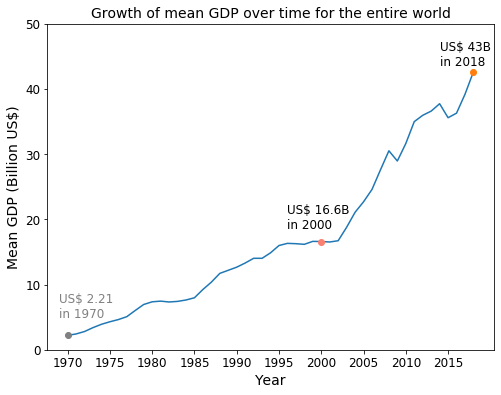

In [22]:
mean_GDP_over_time = gdp_summary_df.groupby('Year')['mean'].first()
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Growth of mean GDP over time for the entire world', fontsize = 14);
ax1.set_xlabel('Year', fontsize = 14)
ax1.set_ylabel('Mean GDP (Billion US$)', fontsize = 14);
ax1.set_ylim([0,50]);
ax1.plot(mean_GDP_over_time.drop(['Latitude','Longitude']));
ax1.plot([48],[mean_GDP_over_time['2018']],'o')
ax1.plot([30],[mean_GDP_over_time['2000']],'o', color = 'salmon')
ax1.plot([0],[mean_GDP_over_time['1970']],'o', color='gray')
xticks_values = [_ for _ in range(0,50,5)];
ax1.set_xticks(xticks_values);
ax1.annotate(f'US$ {round(mean_GDP_over_time["1970"], 2)} \nin 1970', \
             xy=(-1, mean_GDP_over_time['1970']*2.25), fontsize = 12, color='gray')
ax1.annotate('US$ 43B \nin 2018', xy=(44, mean_GDP_over_time['2018']+1), fontsize = 12, color='black')
ax1.annotate('US$ 16.6B \nin 2000', xy=(30-4, mean_GDP_over_time['2000']+2), fontsize = 12, color='black')
ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.legend('Test', loc='right')

# plt.savefig("Images/MeanGDP_over_time.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()

## Display countries colored with GDP values for a chosen year

In [23]:
year = input('Enter a year between 1970 - 2018:')

Enter a year between 1970 - 2018:2017


In [24]:
csv_file = os.path.join('Resources','GDP_1970_to_2018_wLatLng.csv')
gdp_data = pd.read_csv(csv_file)

# Pick only those country codes which correspond to the geojson string file
common_country_names = []
for feature in countries_geojson['features']:
    gmap_country_name = feature['properties']['name']
    if gmap_country_name in list(gdp_data['Country Name']):
        common_country_names.append(gmap_country_name)
len(common_country_names)

gdp_list = []
for country in common_country_names:
    if country in list(gdp_data['Country Name']):
        gdp_val = list(gdp_data[gdp_data['Country Name'] == country][year])[0]
        temp_tuple = (country,round(gdp_val,2))
        gdp_list.append(temp_tuple)
country2gdp = dict(gdp_list)

# We will need to scale the GDP values to lie between 0 and 1
min_gdp = min(country2gdp.values())
max_gdp = max(country2gdp.values())
gdp_range = max_gdp - min_gdp

def calculate_color(gdp_value):
    """
    Convert the GDP coefficient to a color
    """
    # make gini a number between 0 and 1
    normalized_gdp = (gdp_value - min_gdp) / gdp_range

    # invert GDP so that high inequality gives dark color
#     inverse_gdp = 1.0 - normalized_gdp NOT INVERTING TO BRING OUT OUTLIERS
    inverse_gdp = normalized_gdp

    # transform the GDP to a matplotlib color
    mpl_color = viridis(inverse_gdp)

    # transform from a matplotlib color to a valid CSS color
    gmaps_color = to_hex(mpl_color, keep_alpha=False)

    return gmaps_color

#  build an array of colors, one for each country
colors = []
for feature in countries_geojson['features']:
    country_name = feature['properties']['name']
    try:
        gdp = country2gdp[country_name]
        color = calculate_color(gdp)
    except KeyError:
        # no gdp for that country: return default color
        color = (0, 0, 0, 0.3)
    colors.append(color)

D:\Python3.7\envs\PythonData\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [25]:
# Customize the size of the figure
figure_layout = {
    'width': '1000px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '0px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(zoom_level = 2, center = (40,10), layout=figure_layout, display_toolbar = True)
geojson = gmaps.geojson_layer(countries_geojson, fill_opacity=0.05, stroke_weight=2)
fig.add_layer(geojson)
fig

gdp_layer = gmaps.geojson_layer(countries_geojson,fill_color=colors, fill_opacity = 0.8, stroke_weight=2)
fig.add_layer(geojson)
fig

fig.add_layer(gdp_layer)
fig

coordinates = gdp_data[['Latitude','Longitude']]

info_box_list = []
for country in list(gdp_data['Country Name']):
    try:
        gdp_val = list(gdp_data[gdp_data['Country Name'] == country][year])[0]
        info_box_list.append(f'{country}; US$ {round(gdp_val,2)}B')
    except:
        continue
    
symbol_layer = gmaps.symbol_layer(coordinates, \
                                  scale = 2, \
                                  fill_color='red', \
                                  stroke_color='red', \
                                 info_box_content=info_box_list)

# Add layer
fig.add_layer(symbol_layer)

# Display figure
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', margin='0 auto 0 auto', padding='0px', wi…

## Mortality data for 25-34 year old Male/Female in USA for 2010 - 2017

In [26]:
# setup lists
year_labels=[str(_) for _ in range(2010,2018,1)]
male_deaths = []
female_deaths = []
male_percentage = []
female_percentage = []

for year in range(2010,2018,1):
    csv_file = os.path.join('Resources',f'CDC_USA_{str(year)}_25-34y.csv')
    mortality_in_USA = pd.read_csv(csv_file)
    mortality_in_USA = mortality_in_USA.drop(['Year','Year Code','State Code', 'Crude Rate', 'Population'], axis = 1)
    death_count = (mortality_in_USA.groupby(['Gender'])['Deaths'].sum())
    death_percentage = (mortality_in_USA.groupby(['Gender'])['Deaths'].sum())/(mortality_in_USA['Deaths'].sum())*100

    male_deaths.append(death_count['Male']/1000)
    male_percentage.append(death_percentage['Male'])

    female_deaths.append(death_count['Female']/1000)
    female_percentage.append(death_percentage['Female'])

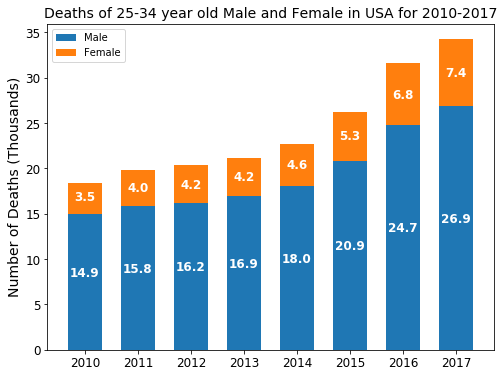

In [27]:
N = 8
male_data = tuple(male_deaths)
female_data = tuple(female_deaths)
ind = np.arange(N)    # the x locations for the groups
width = 0.65      # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(8,6))

p1 = ax.bar(ind, male_deaths, width)
p2 = ax.bar(ind, female_deaths, width, bottom = male_data)

# autolabel(p2)
plt.ylabel('Number of Deaths (Thousands)',fontsize=14)
plt.title('Deaths of 25-34 year old Male and Female in USA for 2010-2017',fontsize=14)
plt.xticks(ind, year_labels,fontsize=14)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.tick_params(axis='both', which='major', labelsize=12)

def autolabel(rects, rects2):
    """Attach a text label above each bar in *rects*, displaying its height."""
    counter = 0
    for rect in rects:
        height = rect.get_height() + rects2[counter].get_height() 
        ax.annotate('{}'.format(round(rect.get_height(),1)),
                    xy=(rect.get_x() + rect.get_width() / 2, rects2[counter].get_height()*1.15),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='top', fontsize=12, color = 'white', weight="bold")
        counter += 1
        
def autolabel2(rects, rects2):
    """Attach a text label above each bar in *rects*, displaying its height."""
    counter = 0
    for rect in rects:
        height = rect.get_height() 
        ax.annotate('{}'.format(round(height,1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height/2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, color = 'white', weight="bold")
        counter += 1        
autolabel2(p1,p2)
autolabel(p2,p1)
# plt.savefig("Images/Deaths_in_USA.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()

## Top 5 Leading causes of death for 25-34 years old Male/Female in the US in 2010 - 2017

In [28]:
# setup lists
year_labels=[str(_) for _ in range(2010,2018,1)]
results_dict = {}
for year in range(2010,2018,1):
    csv_file = os.path.join('Resources',f'CDC_USA_{str(year)}_25-34y.csv')
    mortality_in_USA = pd.read_csv(csv_file)
    mortality_in_USA = mortality_in_USA.drop(['Year','Year Code','State Code', 'Crude Rate', 'Population'], axis = 1)
    death_counts_per_cause = mortality_in_USA.groupby('Cause of death')['Deaths'].sum()
    cause_df = pd.DataFrame({'Number of Deaths':death_counts_per_cause})
#     cause_df['Number of Deaths'].sort()
    top_five_causes = cause_df.sort_values('Number of Deaths', ascending = False).head()
    top_five_causes = top_five_causes.sort_values('Cause of death')
    top_five_causes = top_five_causes = top_five_causes.reset_index()
    results_dict.update({year:list(top_five_causes['Number of Deaths']/top_five_causes['Number of Deaths'].sum()*100)})
top_five_causes.head()

,Cause of death,Number of Deaths
0,Accidental poisoning by and exposure to narcot...,8115
1,Accidental poisoning by and exposure to other ...,6687
2,Assault by other and unspecified firearm disch...,4019
3,"Intentional self-harm by hanging, strangulatio...",2885
4,Person injured in unspecified motor-vehicle ac...,2077


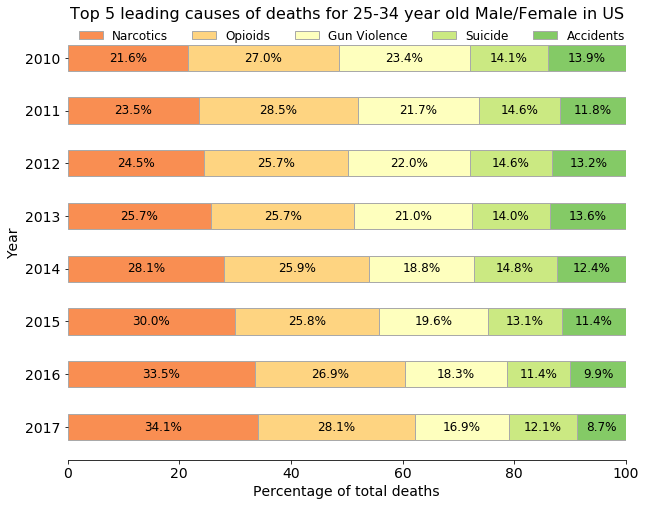

In [29]:
category_names = ['Narcotics', 'Opioids',
                  'Gun Violence', 'Suicide', 'Accidents']
results = results_dict

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    list_of_rects = []
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.25, 0.75, data.shape[1]))

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.invert_yaxis()
    ax.set_xlim(0, np.sum(data, axis=1).max())
    ax.tick_params(axis='both', which='major', labelsize=14)

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]        
        starts = data_cum[:, i] - widths
        list_of_rects.append(ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color, edgecolor = 'darkgray'))
        
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 0.935),
              loc='lower left', fontsize=12, frameon = False)
    return fig, ax, list_of_rects


fig1, ax1, rects = survey(results, category_names)
for _ in range(0,len(rects),1):    
    for rect in rects[_]:
        width = rect.get_width() 
        ax1.annotate('{}%'.format(round(width,1)),
                    xy=(rect.get_x() + rect.get_width()/2, rect.get_y()+rect.get_height()/2),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='center', fontsize='12', color = 'black')
plt.title('Top 5 leading causes of deaths for 25-34 year old Male/Female in US', fontsize = 16)
plt.xlabel('Percentage of total deaths', fontsize = 14)
plt.ylabel('Year', fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=14)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
# plt.show()    
# plt.savefig("Images/Leading_causes_of_deaths_in_USA.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()

# -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-. Nabeel's code ENDS Here -.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.